<a href="https://colab.research.google.com/github/ttcng/5DCC-with-Code-Institute/blob/master/Tang_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Week 3

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [133]:
titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

## Question 1
#### Plot: Create a pie chart which shows the proportion of male/female passengers

In [134]:
slices = titanic.groupby('sex').size()
print(slices)

sex
female    314
male      577
dtype: int64


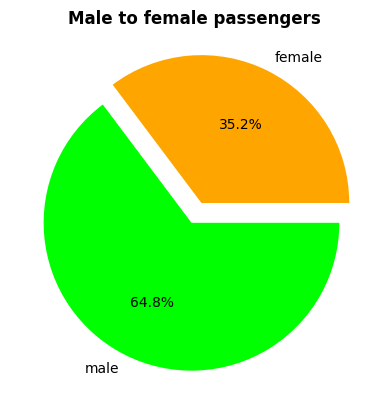

In [135]:
titanic.groupby('sex').size().plot(kind='pie', textprops={'fontsize': 10},
                                 colors=['orange', 'lime'],autopct='%1.1f%%', explode = (0.10, 0.05) )

plt.title('Male to female passengers', fontweight='bold')
plt.show()

## Question 2
####  Pie chart showing proportion of passengers in each class

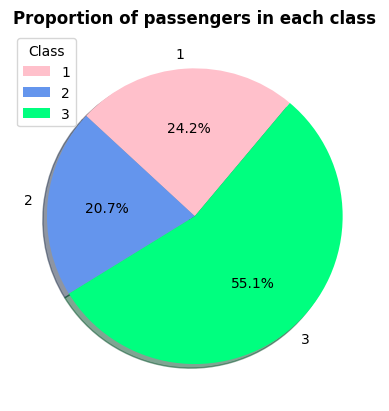

In [136]:
colours = ['pink', 'cornflowerblue', 'springgreen']

titanic.groupby('pclass').size().plot(kind='pie', subplots=True, autopct='%1.1f%%', colors = colours, shadow = True, startangle=50)

# show the plot
plt.title('Proportion of passengers in each class', fontweight='bold')
plt.legend(loc="upper left", title="Class")
plt.show()

## Question 3
#### Plot and interpretation: Explain the relationship between age and fare using a visualisation

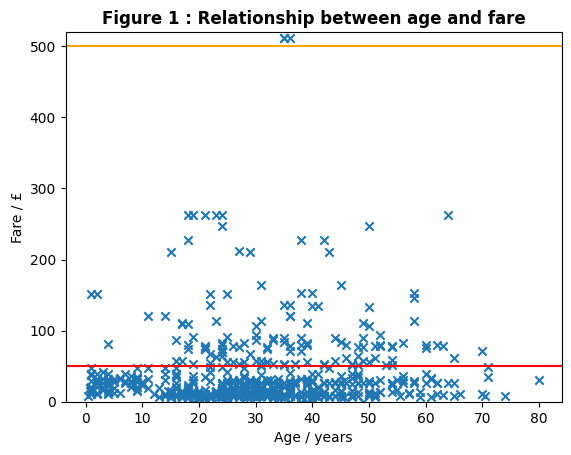

In [137]:
plt.scatter(titanic['age'], titanic['fare'], marker='x')
plt.xlabel('Age / years')
plt.ylabel('Fare / £')
plt.title('Figure 1 : Relationship between age and fare', fontweight='bold')
plt.axhline(y = 50, color = 'r', linestyle = '-')
plt.axhline(y = 500, color = 'orange', linestyle = '-')
plt.ylim(0, 520)

plt.show()

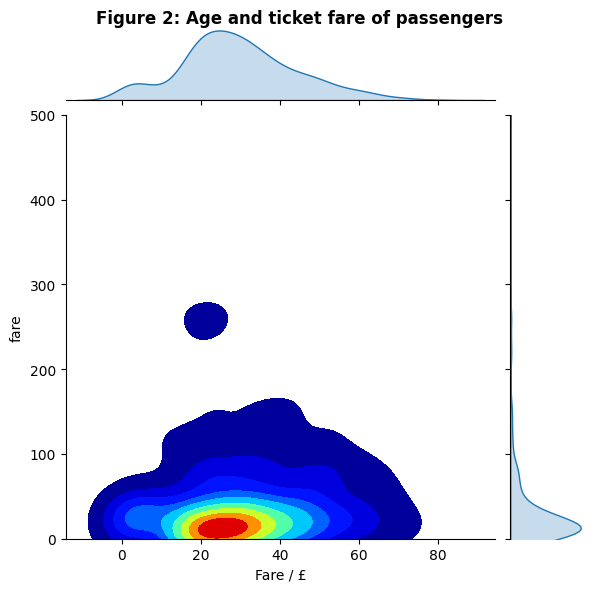

In [138]:
import matplotlib.cm as cm

p = sns.jointplot(x=titanic["age"], y=titanic["fare"], kind='kde', cmap=cm.jet, fill=True)
p.fig.suptitle("Figure 2: Age and ticket fare of passengers", fontweight='bold')
p.fig.subplots_adjust(top=0.95)
p.ax_joint.set_xlabel("Age / years")
p.ax_joint.set_xlabel("Fare / £")
p.ax_marg_y.set_ylim(0, 500)
plt.show()

Interpretation of Figure 1 and 2:
+ Fares costing less that £50 are held by passengers across all ages, demonstrated by points under the red line spanning across all ages.
+ The youngest at just over 0 years, and oldest at just under 80 years, both have tickets under £50.
   + As fares under £50 are likely to be Third Class tickets, this suggests that Third Class ticket holders belonged to people of all ages as opposed to a specific age bracket. This is corroborated by over 55% of passengers holding Third Class tickets as shown above.
+ There are some outliers whereby a couple of late 30-year old passengers bought tickets for more than £500 (see Figure 1).
   + This is unexpected based on the assumption that as people get older they should have accumulated more wealth and thus have more spending power. However, these outliers could be wealthy individuals who were both able to afford these tickets, but also in well enough health to board such a trip, given the life expectancy was around 50-55 years in 1912.
+ The next most expensive fares are held by passengers in their late teens to mid-20s.
   + These are likely to be a group of wealthy socialites or aristocrats with the funds for the experience.
+ Fares between £50 and £100 are predominantly belong to passengers between 20 and 40 years old.
   + This could be due to higher class fares, as opposed to third class fares, as well as the increase from child to adult fares.
+ Overall there is very weak positive correlation between age and fare. However, it is not a definitive conclusion due to the nature of the passenger population distribution with age, with the majority of passengers between 20-35 (see Figure 2).


## Question 4
#### Plot and interpretation: What is the survival ratio by age, sex, and class

#### By Age

In [139]:
# Age
ages = titanic['age'].dropna()
bins = [i for i in range(0,90,10)]
bins
categorised = pd.cut(ages,bins)
titanic['age_bins'] = categorised

In [140]:
bins
ax_labels = []
for i in range(1,len(bins)):
  ax_labels.append("{} ≤ {}".format(bins[i-1], bins[i]))

In [141]:
age_survival = titanic.groupby(['age_bins', 'alive']).agg('size').unstack()
age_survived = age_survival["yes"]/(age_survival["yes"]+age_survival["no"])
age_not = age_survival["no"]/(age_survival["yes"]+age_survival["no"])
age_labels = pd.concat([age_not, age_survived], axis=0).apply('{:.0%}'.format)

In [142]:
asSeries = pd.Series(ax_labels)
age_survival_ratio = pd.concat([asSeries, pd.Series([1-j for j in age_survived]), pd.Series([i for i in age_survived])], axis=1)

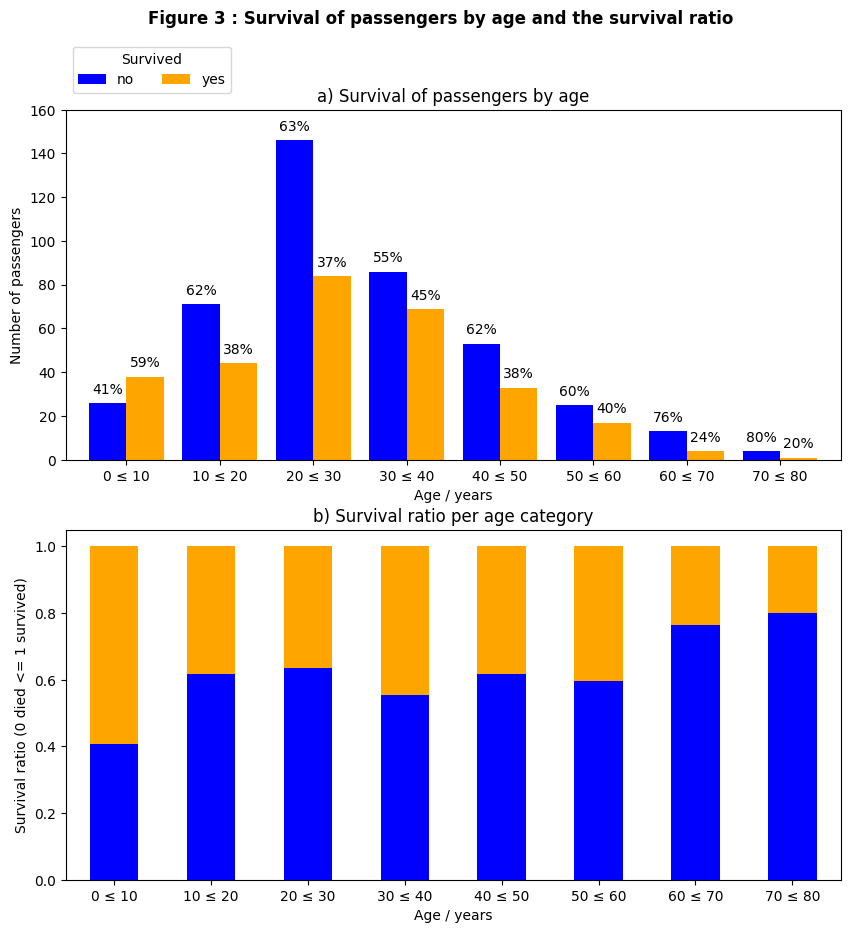

In [143]:
fig0, axes0 = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
fig0.suptitle('Figure 3 : Survival of passengers by age and the survival ratio', fontweight='bold')

ax = age_survival.plot(kind = 'bar', color=['blue','orange'], width=0.8, legend=True, ax = axes0[0])
ax.legend(title="Survived", loc="upper left", bbox_to_anchor=(0, 1.2), ncol=2)
ax.set_xlabel("Age / years")
ax.set_ylabel("Number of passengers")
ax.set_ylim([0, 160])
ax.set_title("a) Survival of passengers by age")
ax.set_xticklabels(ax_labels, rotation="horizontal")

rects = ax.patches
for rect, label in zip(rects, age_labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom"
    )

ax0 = age_survival_ratio.plot(ax = axes0[1], kind='bar', color=['blue','orange'], stacked=True, legend=False)
ax0.set_xlabel("Age / years")
ax0.set_ylabel("Survival ratio (0 died <= 1 survived)")
ax0.set_title("b) Survival ratio per age category")
ax0.set_xticklabels(age_survival_ratio[0], rotation="horizontal")

plt.show()

#### Survival of passengers by age
Here the graph shows the percentages of survived and died for each age category.
+ The only age category with a survival rate above 50% is 0 <= 10, and as such is the age category with the highest survival ratio. This is because children were prioritised in travelling on the lifeboats and so had a higher survival rate.
+ The least likely to survive were those between 70 and 80 at 20%, followed by those between 60 and 80 at 24%. The elderly as a category were not prioritised for lifeboats (as opposed to women and children), and were also likely to be the most frail and less able to withstand the outside elements.
+ Of the remaining age categories, survival ranged between 37% and 45%.
+ Whilst the highest number of survivals were for 20-30 year olds, this age category has the third lowest survival ratio. This is likely due to these passengers being younger and fitter, so more likely to survive. However the survival ratio is low due to the large number of passengers aged between 20-30, lowering the survival ratio.
   + The survival ratio alone is misleading as these represent proportions of different sized categories. Thus, the following graphs are annotated with the relative survival percentages for each category, but the survival ratio itself is not graphed.


#### By Gender and Class

In [144]:
gender_survival = titanic.groupby(['sex', 'alive']).agg('size').unstack()

gender_survived = gender_survival["yes"]/(gender_survival["yes"]+gender_survival["no"])
gender_not = gender_survival["no"]/(gender_survival["yes"]+gender_survival["no"])
gender_labels = pd.concat([gender_not, gender_survived], axis=0).apply('{:.0%}'.format)

In [145]:
class_survival = titanic.groupby(['class', 'alive']).agg('size').unstack()

class_survived = class_survival["yes"]/(class_survival["yes"]+class_survival["no"])
class_not = class_survival["no"]/(class_survival["yes"]+class_survival["no"])
class_labels = pd.concat([class_not, class_survived], axis=0).apply('{:.0%}'.format)

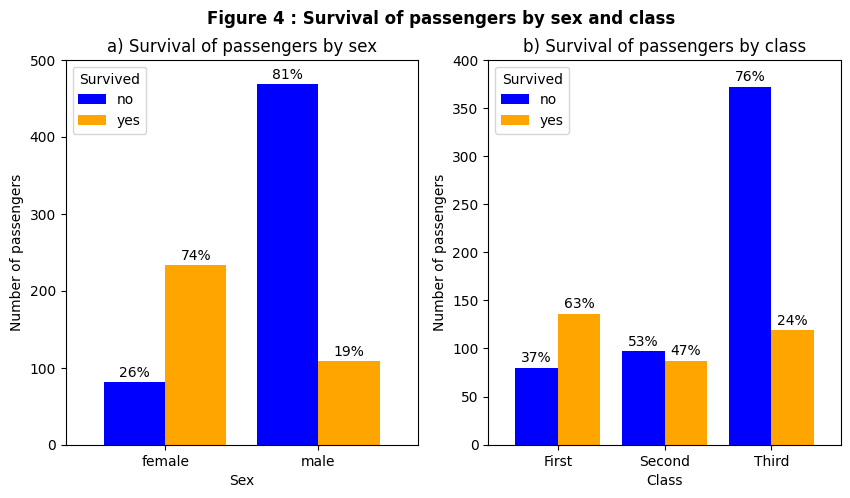

In [146]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle('Figure 4 : Survival of passengers by sex and class', fontweight='bold')
ax1 = gender_survival.plot(kind = 'bar', color=['blue','orange'], width=0.8, legend=True, ax = axes[0])
ax1.legend(title="Survived", loc="upper left")
ax1.set_xlabel("Sex")
ax1.set_ylabel("Number of passengers")
ax1.set_ylim(([0,500]))
ax1.tick_params(labelrotation=0)
ax1.title.set_text("a) Survival of passengers by sex")

bars1 = ax1.patches

for rect, label in zip(bars1, gender_labels):
    height = rect.get_height()
    ax1.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom"
    )

ax2 = class_survival.plot(kind = 'bar', color=['blue','orange'], width=0.8,legend=True, ax = axes[1])
ax2.legend(title="Survived", loc="upper left")
ax2.set_xlabel("Class")
ax2.set_ylabel("Number of passengers")
ax2.set_ylim(([0,400]))
ax2.tick_params(labelrotation=0)
ax2.title.set_text("b) Survival of passengers by class")

bars2 = ax2.patches
for rect, label in zip(bars2, class_labels):
    height = rect.get_height()
    ax2.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom"
    )

#### Survival of passengers by sex and class
By Sex
+ The majority of females (74%) survived, whereas the majority of males (81%) did not. These numbers are likely due to women being prioritised for lifeboats, as well as a larger number of male passengers (see first Pie Chart in homework). Thus whilst a larger number of men survived than the females who died, the percentage of men surviving is a lower percentage than the percentage of females who died.

By Class
+ From the pie chart above, the largest class is third class, followed by first class, and the smallest class is second class.
+ Only first class has a survival ratio > 50%, and also has the largest number of survivors.
   + This may be due to those with greater wealth having the choice and connections to get on the life boats first.
+ Second class is more even, with almost half of second class passengers surviving. However, the survival ratio is inflated owing to the smaller number of second class passengers.
+ The class with the lowest survival ratio is third class, with only 24% surviving. Whilst this ratio is the smallest, third class has the second highest number of survivors by magnitude due to the large number of passengers in third class.
   + Furthermore, those in third class are more likely to live in worse living conditions and as such may have more frailties that make them less prone to surviving.

## Question 4 : To further investigate, more graphs showing class and gender by age were inspected.

##### Sex split by age categories

In [147]:
by_age_females = titanic[titanic['sex']=='female'].groupby(['age_bins', 'alive']).agg('size').unstack()
baf_survived = by_age_females["yes"]/(by_age_females["yes"]+by_age_females["no"])
baf_not = by_age_females["no"]/(by_age_females["yes"]+by_age_females["no"])
by_age_females_labels = pd.concat([baf_not, baf_survived], axis=0).apply('{:.0%}'.format)

In [148]:
by_age_males = titanic[titanic['sex']=='male'].groupby(['age_bins', 'alive']).agg('size').unstack()
bam_survived = by_age_males["yes"]/(by_age_males["yes"]+by_age_males["no"])
bam_not = by_age_males["no"]/(by_age_males["yes"]+by_age_males["no"])
by_age_males_labels = pd.concat([bam_not, bam_survived], axis=0).apply('{:.0%}'.format)

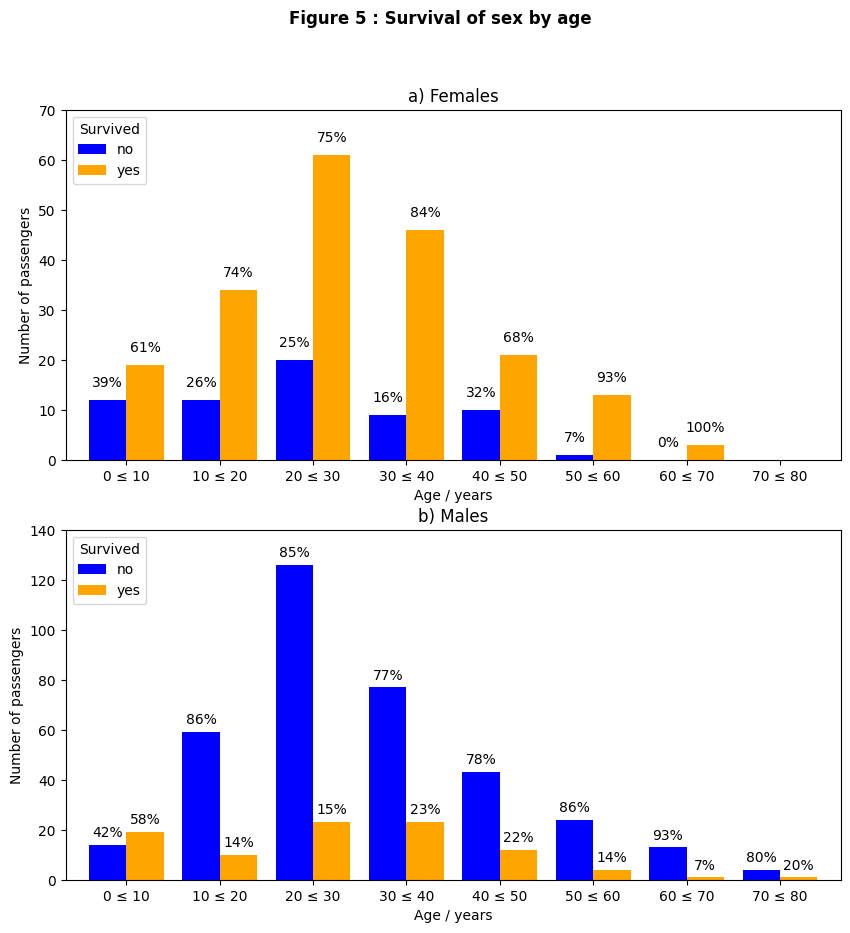

In [149]:
fig1, axes1 = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
fig1.suptitle('Figure 5 : Survival of sex by age', fontweight='bold')

ax3 = by_age_females.plot(kind = 'bar', color=['blue','orange'], width=0.8, legend=True, ax = axes1[0])
ax3.legend(title="Survived", loc="upper left")
ax3.set_xlabel("Age / years")
ax3.set_ylabel("Number of passengers")
ax3.set_ylim([0, 70])
ax3.set_xticklabels(ax_labels, rotation="horizontal")
ax3.set_title("a) Females")

bars3 = ax3.patches
for rect, label in zip(bars3, by_age_females_labels):
    height = rect.get_height()
    if "nan" in label:
      ax3.text(
        rect.get_x() + rect.get_width() / 2, height + 2, "", ha="center", va="bottom"
    )
    else:
      ax3.text(
          rect.get_x() + rect.get_width() / 2, height + 2, label, ha="center", va="bottom"
      )

ax4 = by_age_males.plot(kind = 'bar', color=['blue','orange'], width=0.8, legend=True, ax = axes1[1])
ax4.legend(title="Survived", loc="upper left")
ax4.set_xlabel("Age / years")
ax4.set_ylabel("Number of passengers")
ax4.set_ylim([0, 140])
ax4.set_xticklabels(ax_labels, rotation="horizontal")
ax4.set_title("b) Males")

bars4 = ax4.patches
for rect, label in zip(bars4, by_age_males_labels):
    height = rect.get_height()
    ax4.text(
        rect.get_x() + rect.get_width() / 2, height + 2, label, ha="center", va="bottom"
    )

plt.show()

+ For females, the surivival ratio per age category is above 50% across all ages. The age category with the lowest survival ratio is 0-10, whereby 61% of female children survived. This may be due to children being more prone to the cold and illnesses, and also a lower chance of surviving if not on the lifeboats.
+ The highest survival ratios for the age categories are for females above 50, showing that elderly women survived. It is likely they were prioritised for the lifeboats.
+ For males, only male children had a survival ratio > 50%, and had passenger numbers comparable to females.
+ Across all remaining age categories up to 70 years old, the number of males surviving and the survival ratio is less than that of females. Again this is likely due to women being prioritised for lifeboats, as well as there being more men on board than females (see earlier pie chart).
+ This demonstrates that gender is a strong predicting factor for survival, with females much more likely to survive than males.


##### Class split by age categories

In [150]:
by_age_class1 = titanic[titanic['class']=='First'].groupby(['age_bins', 'alive']).agg('size').unstack()
class1_survived = by_age_class1["yes"]/(by_age_class1["yes"]+by_age_class1["no"])
class1_not = by_age_class1["no"]/(by_age_class1["yes"]+by_age_class1["no"])
class1_labels = pd.concat([class1_not, class1_survived], axis=0).apply('{:.0%}'.format)

by_age_class2 = titanic[titanic['class']=='Second'].groupby(['age_bins', 'alive']).agg('size').unstack()
class2_survived = by_age_class2["yes"]/(by_age_class2["yes"]+by_age_class2["no"])
class2_not = by_age_class2["no"]/(by_age_class2["yes"]+by_age_class2["no"])
class2_labels = pd.concat([class2_not, class2_survived], axis=0).apply('{:.0%}'.format)

by_age_class3 = titanic[titanic['class']=='Third'].groupby(['age_bins', 'alive']).agg('size').unstack()
class3_survived = by_age_class3["yes"]/(by_age_class3["yes"]+by_age_class3["no"])
class3_not = by_age_class3["no"]/(by_age_class3["yes"]+by_age_class3["no"])
class3_labels = pd.concat([class3_not, class3_survived], axis=0).apply('{:.0%}'.format)

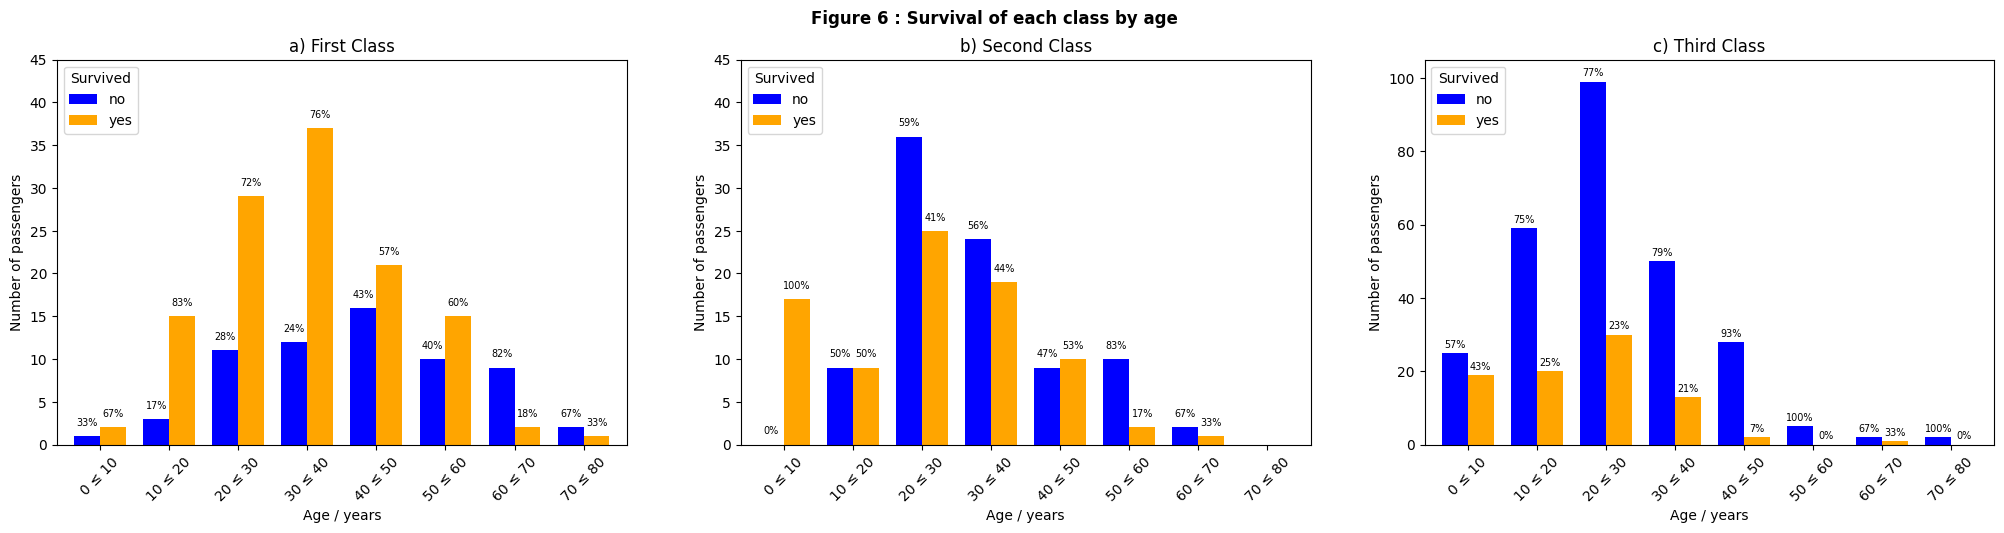

In [151]:
fig2, axes2 = plt.subplots(nrows = 1, ncols=3, figsize=(25, 5))
fig2.suptitle('Figure 6 : Survival of each class by age', fontweight='bold')

# First Class
ax5 = by_age_class1.plot(kind = 'bar', color=['blue','orange'], width=0.75, legend=True, ax = axes2[0])
ax5.legend(title="Survived", loc="upper left")
ax5.set_xlabel("Age / years")
ax5.set_ylabel("Number of passengers")
ax5.set_ylim([0, 45])
ax5.set_xticklabels(ax_labels, rotation=45)
ax5.set_title("a) First Class")

bars5 = ax5.patches
for rect, label in zip(bars5, class1_labels):
    height = rect.get_height()
    ax5.text(
        rect.get_x() + rect.get_width() / 2, height + 1, label, ha="center", va="bottom", fontsize='x-small'
    )

# Second Class
ax6 = by_age_class2.plot(kind = 'bar', color=['blue','orange'], width=0.75, legend=True, ax = axes2[1])
ax6.legend(title="Survived", loc="upper left")
ax6.set_xlabel("Age / years")
ax6.set_ylabel("Number of passengers")
ax6.set_ylim([0, 45])
ax6.set_xticklabels(ax_labels, rotation=45)
ax6.set_title("b) Second Class")

bars6 = ax6.patches
for rect, label in zip(bars6, class2_labels):
    height = rect.get_height()
    if "nan" in label:
      ax6.text(
          rect.get_x() + rect.get_width() / 2, height + 1, "", ha="center", va="bottom", fontsize='x-small'
      )
    else:
      ax6.text(
          rect.get_x() + rect.get_width() / 2, height + 1, label, ha="center", va="bottom", fontsize='x-small'
      )

# Third Class
ax7 = by_age_class3.plot(kind = 'bar', color=['blue','orange'], width=0.75, legend=True, ax = axes2[2])
ax7.legend(title="Survived", loc="upper left")
ax7.set_xlabel("Age / years")
ax7.set_ylabel("Number of passengers")
ax7.set_ylim([0, 105])
ax7.set_xticklabels(ax_labels, rotation=45)
ax7.set_title("c) Third Class")

bars7 = ax7.patches
for rect, label in zip(bars7, class3_labels):
    height = rect.get_height()
    ax7.text(
        rect.get_x() + rect.get_width() / 2, height + 1, label, ha="center", va="bottom", fontsize='x-small'
    )

plt.show()

+ Corroborating the conclusions before, the survival ratio of first class passengers is predominantly greater than 50%, whereas the survival ratio of third class passengers is less than 50% for all age categories. The survival ratio of second class is much more varied, despite having similar numbers of passengers to first class.
+ This demonstrates that no matter your age, class is a stronger factor for predicting whether or not a passenger were to survive.
